# Insert and Load Data

In [16]:
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Plot  Train_Images

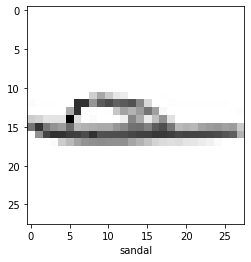

In [17]:
import matplotlib.pyplot as plt
label_names =['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
plt.xlabel(label_names[train_labels[30]])
plt.imshow(train_images[30],cmap =plt.cm.binary)

# Normalize and reshape the data

In [18]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [19]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Build/Compile and Train the model

In [20]:
from tensorflow.keras import  layers, models
import tensorflow as tf
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(train_images, train_labels, epochs=10)                  

Epoch 1/10
60000/60000 [==============================] - 22s 363us/sample - loss: 0.3855 - acc: 0.8629
Epoch 2/10
60000/60000 [==============================] - 21s 355us/sample - loss: 0.2627 - acc: 0.9044
Epoch 3/10
60000/60000 [==============================] - 23s 382us/sample - loss: 0.2189 - acc: 0.9187
Epoch 4/10
60000/60000 [==============================] - 21s 345us/sample - loss: 0.1862 - acc: 0.9308
Epoch 5/10
60000/60000 [==============================] - 22s 367us/sample - loss: 0.1607 - acc: 0.9408
Epoch 6/10
60000/60000 [==============================] - 22s 364us/sample - loss: 0.1371 - acc: 0.9498
Epoch 7/10
60000/60000 [==============================] - 22s 372us/sample - loss: 0.1177 - acc: 0.9566
Epoch 8/10
60000/60000 [==============================] - 24s 396us/sample - loss: 0.1004 - acc: 0.9632
Epoch 9/10
60000/60000 [==============================] - 21s 347us/sample - loss: 0.0844 - acc: 0.9692
Epoch 10/10
60000/60000 [==============================] - 21s 3

# Predict Test_Images

In [23]:
import numpy as np
prediction = model.predict(test_images)
prediction = np.argmax(prediction, axis=1)

In [25]:
print("Prediction      : " , prediction[:30])
print("Test_Labels     : " , test_labels[:30])


Prediction      :  [9 2 1 1 6 1 4 6 5 7 4 5 8 3 2 1 2 4 8 0 2 5 7 5 1 2 6 0 9 3]
Test_Labels     :  [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3]


Calculate Error with MSE

In [14]:
mse = np.square(np.subtract(test_labels, prediction)).mean()
print(mse)

1.2352
